In [1]:
print("hello")

hello


In [2]:
import nltk

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [4]:
train = pd.read_csv(r'C:\Users\Hp\Desktop\Python\NLP\COVID19Tweet-master\train1.tsv', sep='\t')
val = pd.read_csv(r'C:\Users\Hp\Desktop\Python\NLP\COVID19Tweet-master\valid.tsv', sep='\t')
test = pd.read_csv(r'C:\Users\Hp\Desktop\Python\NLP\COVID19Tweet-master\unlabeled_test_with_noise.tsv', sep='\t')
print(train.shape)
print(val.shape)
print(test.shape)


(6932, 3)
(1000, 3)
(12000, 2)


In [5]:
import sys
import os

label_map = {"UNINFORMATIVE": 0, "INFORMATIVE": 1}

In [ ]:
# From the evaluator.py script in the dataset github repo
'''
def get_labels(file_in, gold_indices=None):
    """
    Read the labels from file
    :param file_in: path to the file
    :param gold_indices: set of gold indices
    :return: list of labels
    """
    labels = []
    count = 0
    with open(file_in) as reader:
        for line in reader:
            line = line.strip()
            if line == "Id\tText\tLabel":
                continue
            count += 1
            if gold_indices is not None and count not in gold_indices:
                continue

            label = line.split()[-1].upper()
            if len(label) == 0:
                continue

            if label in label_map:
                labels.append(label_map[label])
            else:
                print("Error occurs at line {}. "
                      "{} is not a label (only support UNINFORMATIVE and INFORMATIVE). "
                      "Process terminated.".format(count + 1, label))
                sys.exit()


    return labels
    
    '''

In [51]:
train1.head()

,Id,Text,Label
0,1.241490e+18,Official death toll from #covid19 in the Unite...,INFORMATIVE
1,1.245920e+18,"Dearest Mr. President @USER 1,169 coronavirus ...",INFORMATIVE
2,1.241130e+18,Latest Updates March 20 ⚠️5274 new cases and 3...,INFORMATIVE
3,1.236110e+18,真把公主不当干部 BREAKING: 21 people on Grand Princess...,INFORMATIVE
4,1.239670e+18,OKLAHOMA CITY — The State Department of Educat...,UNINFORMATIVE


In [52]:
val.head()

,Id,Text,Label
0,1241728922192142336,For those saying Pakistan isn’t Italy; After 3...,UNINFORMATIVE
1,1235713405992030209,Second case DR 🇩🇴 The Canadian woman has not b...,INFORMATIVE
2,1245941302367305728,Kill Chain: the cyber war on America's electio...,UNINFORMATIVE
3,1245913002840391681,Town hosts FIRST #Virtual #TownCouncil meeting...,UNINFORMATIVE
4,1240543259299987457,Report suggested that the actual number of und...,UNINFORMATIVE


In [31]:
# All Uninformative Tweets 
train[train['Label'] == 'UNINFORMATIVE'].head(10)

,Id,Text,Label
4,1239673817552879619,OKLAHOMA CITY — The State Department of Educat...,UNINFORMATIVE
5,1240790181860409344,Democrats somehow managed to fight ebola witho...,UNINFORMATIVE
8,1236363091002011649,“Coronavirus impact: Close Taj Mahal till Marc...,UNINFORMATIVE
9,1245725162957242368,Dear @USER In #COVID2019 case...give tools &am...,UNINFORMATIVE
10,1240721152076546049,Los Angeles is now the county with the highest...,UNINFORMATIVE
12,1242799513619664896,Watch Live !! Discussion on #COVID19 with Unio...,UNINFORMATIVE
13,1251122786225045504,Coronavirus cases in Africa could shoot up fro...,UNINFORMATIVE
14,1241449715654410240,“According to their report if you come in cont...,UNINFORMATIVE
15,1241173819693252608,Senators urge Jeff Bezos to give Amazon wareho...,UNINFORMATIVE
20,1244684987351404551,I think the President Cyril Ramaphosa should a...,UNINFORMATIVE


In [32]:
# Informative Tweets 
train[train['Label'] == 'INFORMATIVE'].head(10)

,Id,Text,Label
0,1241490299215634434,Official death toll from #covid19 in the Unite...,INFORMATIVE
1,1245916400981381130,"Dearest Mr. President @USER 1,169 coronavirus ...",INFORMATIVE
2,1241132432402849793,Latest Updates March 20 ⚠️5274 new cases and 3...,INFORMATIVE
3,1236107253666607104,真把公主不当干部 BREAKING: 21 people on Grand Princess...,INFORMATIVE
6,1249147011003187200,"as number of #COVID19 deaths surpassed 100,000...",INFORMATIVE
7,1241533144802758656,"@USER @USER 1 week ago today (March 14), there...",INFORMATIVE
11,1246739551227387905,#COVID19 Updates. #SothSudan's fist positive p...,INFORMATIVE
16,1245311331579899906,A @USER professor has died after contracting #...,INFORMATIVE
17,1240108182409601024,EU imposes entry ban for 30 days while death t...,INFORMATIVE
18,1248321628808728576,إِنَّا لِلّهِ وَإِنَّـا إِلَيْهِ رَاجِعُونَ Sa...,INFORMATIVE


UNINFORMATIVE    3663
INFORMATIVE      3273
Name: Label, dtype: int64


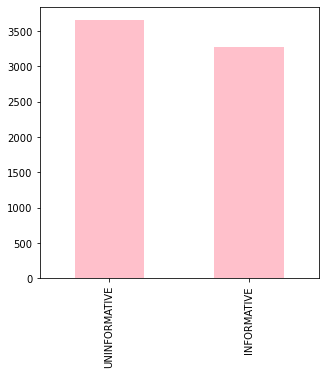

In [40]:
# Count of Informative and Uninformative Tweest 
train['Label'].value_counts().plot.bar(color = 'pink', figsize = (5, 5)) # pandas function 
print(train['Label'].value_counts())

<class 'numpy.ndarray'> 1717
@USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER @USER #CoronaVirus will likely increase in Subsaharan Africa bc the ambient temperature reduces to below 26/27C at which the virus dies under heat. That’s the narrative. Test. Test. Test But #StayHomeSafe is the best way 1918 Nigeria lost 2% of 17 million people to Flu!


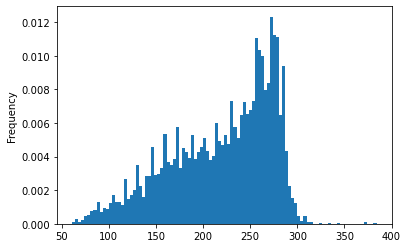

In [48]:
# Temp keeping becuase used to debug clumps of data in the training set 
#length_train = train['Text'].str.len().plot.hist(color = 'yellow', figsize = (15, 4))
l = np.array([le for le in train['Text'].str.len()])
print(type(l), np.argmax(l, axis=0))
num = np.argmax(l, axis=0)
#print(max(l))
plt.hist(l, density=True, bins=100)  # `density=False` would make counts
plt.ylabel('Frequency')
#plt.xlabel('')
print(train['Text'][num])
# 4339 is problematic, too mant tweets are clubbed together 

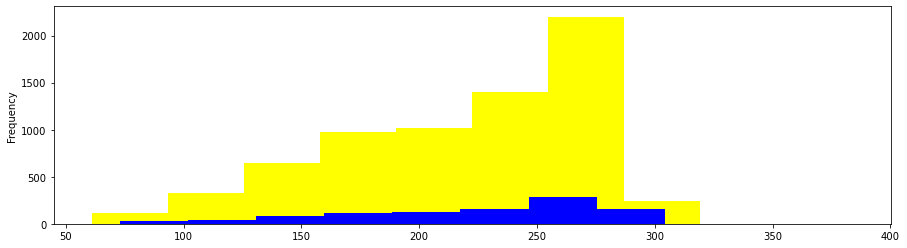

In [55]:
# checking the distribution of tweets in the data
# Train and Val 
length_train = train['Text'].str.len().plot.hist(color = 'yellow', figsize = (15, 4))
length_val = val['Text'].str.len().plot.hist(color = 'blue', figsize = (15, 4))

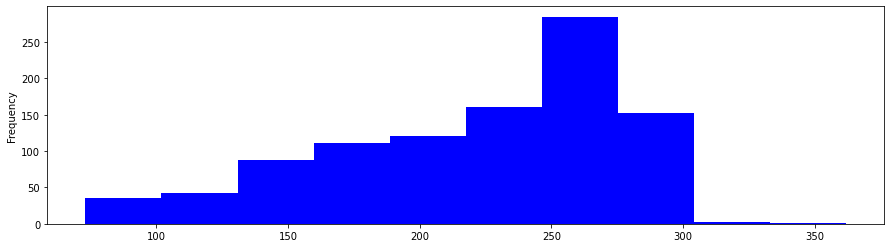

In [15]:
# Val alone 
length_val = val['Text'].str.len().plot.hist(color = 'blue', figsize = (15, 4))
#length_test = test['Text'].str.len().plot.hist(color = 'orange', figsize = (15, 4))

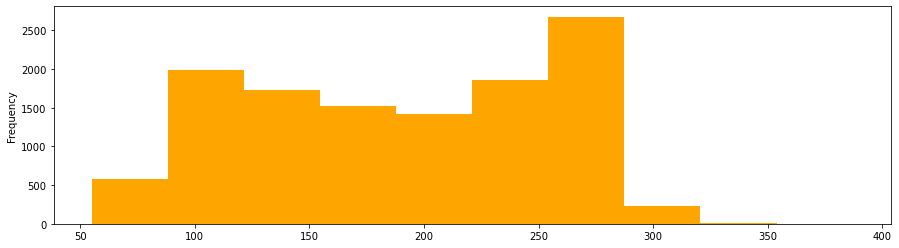

In [16]:
# Only test (12000 examples )
length_test = test['Text'].str.len().plot.hist(color = 'orange', figsize = (15, 4))

In [49]:
# general traits 
train.groupby('Label').describe()

Id                                                          \
                count          mean           std           min           25%   
Label                                                                           
INFORMATIVE    3273.0  1.242323e+18  4.337500e+15  1.235405e+18  1.240011e+18   
UNINFORMATIVE  3663.0  1.242879e+18  4.269091e+15  1.235396e+18  1.240711e+18   

                                                         
                        50%           75%           max  
Label                                                    
INFORMATIVE    1.241628e+18  1.245831e+18  1.252189e+18  
UNINFORMATIVE  1.242864e+18  1.245915e+18  1.252198e+18

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

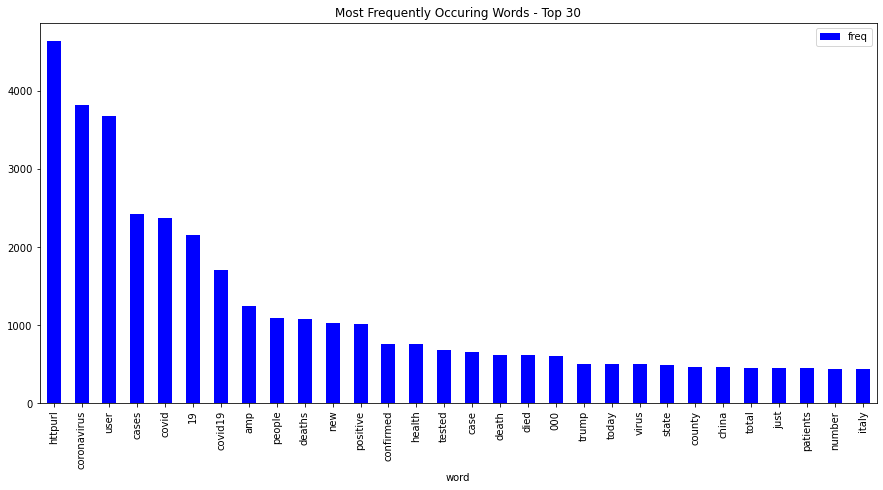

In [6]:
# Most Commonly Occuring Words 
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.Text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


In [7]:
print(len(cv.vocabulary_.items()), type(cv.vocabulary_.items()))

20154 <class 'dict_items'>


Text(0.5, 1.0, 'WordCloud - Vocabulary from Tweets')

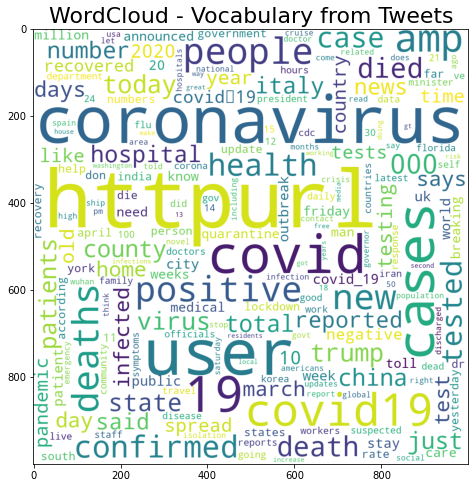

In [69]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Tweets", fontsize = 22)

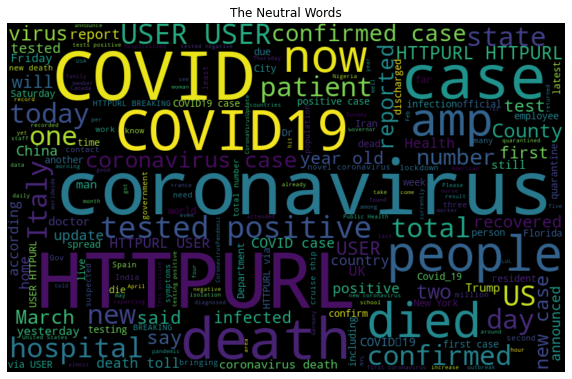

In [71]:
normal_words =' '.join([text for text in train['Text'][train['Label'] == "INFORMATIVE"]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

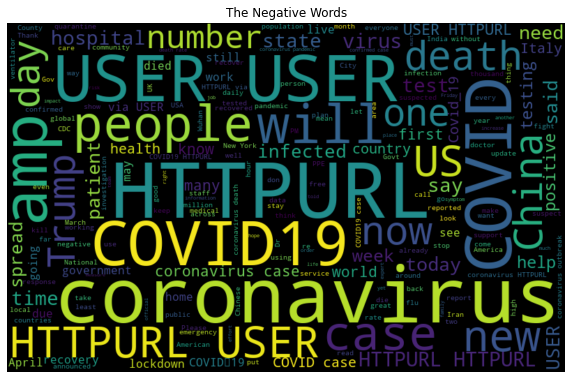

In [75]:
negative_words =' '.join([text for text in train['Text'][train['Label'] == "UNINFORMATIVE"]])

wordcloud = WordCloud(background_color = 'black', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [76]:
# Hashtag Extraction 
# Try using TweetTokenizer in the nltk module ##################3
def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [78]:
import re
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['Text'][train['Label'] == "UNINFORMATIVE"])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['Text'][train['Label'] == "INFORMATIVE"])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

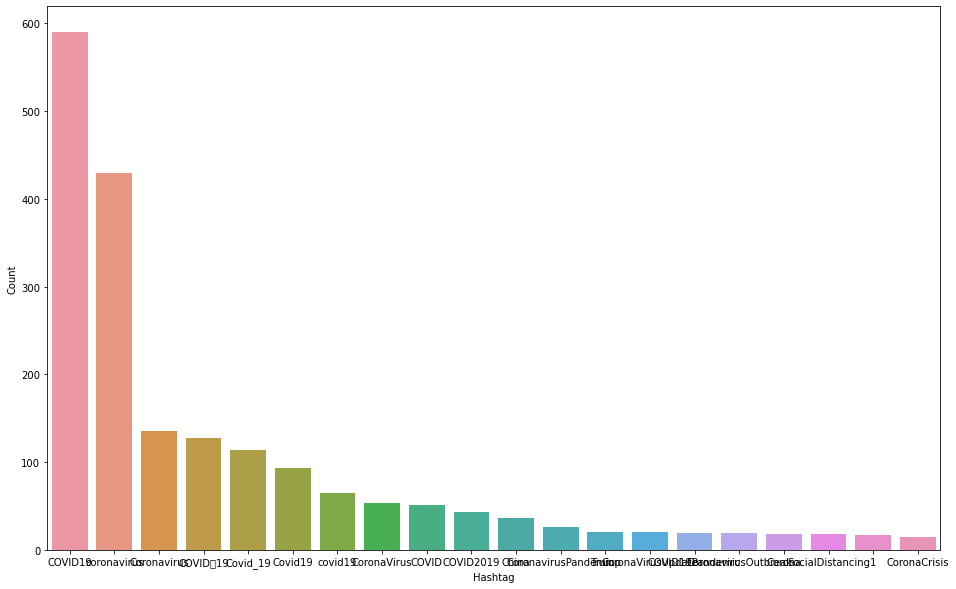

In [80]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,10))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

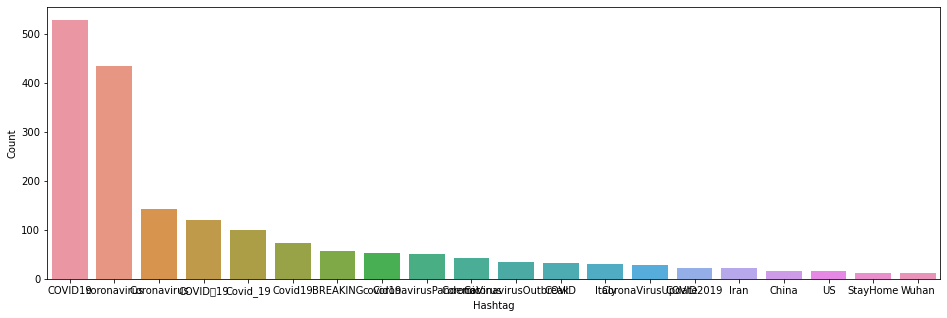

In [81]:

a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [5]:
# tokenizing the words present in the training set
tokenized_tweet = train['Text'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['Text']), epochs=20)

(3542732, 4973800)

In [6]:
print(tokenized_tweet)

0       [Official, death, toll, from, #covid19, in, th...
1       [Dearest, Mr., President, @USER, 1,169, corona...
2       [Latest, Updates, March, 20, ⚠️5274, new, case...
3       [真把公主不当干部, BREAKING:, 21, people, on, Grand, P...
4       [OKLAHOMA, CITY, —, The, State, Department, of...
                              ...                        
6927    [.@USER, makes, major, announcement, in, view,...
6928    [❌QUESTION, ..., did, they, receive, a, Ventil...
6929    [CMT, will, air, a, special, celebrating, the,...
6930    [Current, 🇮🇩, COVID19, testing, procedure, onl...
6931    [A, preview, of, what’s, to, come,, the, furth...
Name: Text, Length: 6932, dtype: object


In [7]:
model_w2v.wv.most_similar(positive = "covid")

[('Covid', 0.6164124011993408),
 ('dey', 0.550911545753479),
 ('cepat', 0.5373544692993164),
 ('dent', 0.5292280316352844),
 ('padami', 0.5268642902374268),
 ('arguing', 0.5248963832855225),
 ('ccp', 0.5248445272445679),
 ('covid19', 0.5248187780380249),
 ('COVID', 0.5197167992591858),
 ('sense.', 0.5153771638870239)]

In [8]:
model_w2v.wv.most_similar(positive = "music")

[('festivals', 0.7282789945602417),
 ('statements', 0.6644861698150635),
 ('MPs', 0.6460443735122681),
 ('Reporter', 0.6433976888656616),
 ('Magic', 0.6423506736755371),
 ('Drogba', 0.6373395323753357),
 ('famous', 0.6345986127853394),
 ('turbulent', 0.6225078105926514),
 ('Tech', 0.6203407645225525),
 ('#BTSARMY', 0.6184964179992676)]

In [9]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import LabeledSentence

C:\Users\Hp\anaconda3\envs\nlp\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [10]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(LabeledSentence(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:3]

<ipython-input-10-677e243a33d2>:4: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  output.append(LabeledSentence(s, ["tweet_" + str(i)]))


[LabeledSentence(words=['Official', 'death', 'toll', 'from', '#covid19', 'in', 'the', 'United', 'Kingdom', 'is', 'now', 'GREATER', 'than:', 'Germany', '+', 'Poland', '+', 'Switzerland', '+', 'Austria', '+', 'Portugal', '+', 'Greece', '+', 'Sweden', '+', 'Finland', '+', 'Norway', '+', 'Ireland...', 'COMBINED.', 'UK:', '67.5', 'Million', '(233', 'dead)', 'Above', 'group:', '185', 'Million', '(230', 'dead)', 'HTTPURL'], tags=['tweet_0']),
 LabeledSentence(words=['Dearest', 'Mr.', 'President', '@USER', '1,169', 'coronavirus', 'deaths', 'in', 'the', 'US', 'in', '24', 'hours', '(?)', 'Covid19', 'pandemic', 'is', 'an', 'international', 'crime', 'from', 'China', '-', 'not', 'a', 'nature', 'disasster!', 'Please', 'use', 'your', 'authorities', 'to', 'protect', 'your', 'people', 'and', 'world', 'against', 'China!', '#ChinaHasToCompensateAll'], tags=['tweet_1']),
 LabeledSentence(words=['Latest', 'Updates', 'March', '20', '⚠️5274', 'new', 'cases', 'and', '38', 'new', 'deaths', 'in', 'the', 'United

In [11]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:

train_corpus = []

for i in range(0, 6932):
  review = re.sub('[^a-zA-Z]', ' ', train['Text'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [13]:
print(train_corpus)

['offici death toll covid unit kingdom greater germani poland switzerland austria portug greec sweden finland norway ireland combin uk million dead group million dead httpurl', 'dearest mr presid user coronaviru death us hour covid pandem intern crime china natur disasst pleas use author protect peopl world china chinahastocompensateal', 'latest updat march new case new death unit state illinoi governo pritzker issu stay home order resid new york governor cuomo order non essenti worker stay home penn sourc coronaviru countri us', 'break peopl grand princess cruis ship dock california coast test posit coronaviru includ crew member two passeng vice pre mike penc say peopl test neg httpurl httpurl', 'oklahoma citi state depart educ announc monday closur k public school statewid least april number covid case climb risk commun spread grow httpurl', 'democrat somehow manag fight ebola without call african viru cluster covid case emerg new york citi hassid neighborhood matter time local trump

In [14]:
test_corpus = []

for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', val['Text'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [15]:

# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)

(6932, 2500)
(6932,)


In [16]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(1000, 2500)


In [17]:

# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(5199, 2500)
(1733, 2500)
(5199,)
(1733,)


In [18]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)